 # Clustering
 
 
 #### KMeans Clustering on an array of points

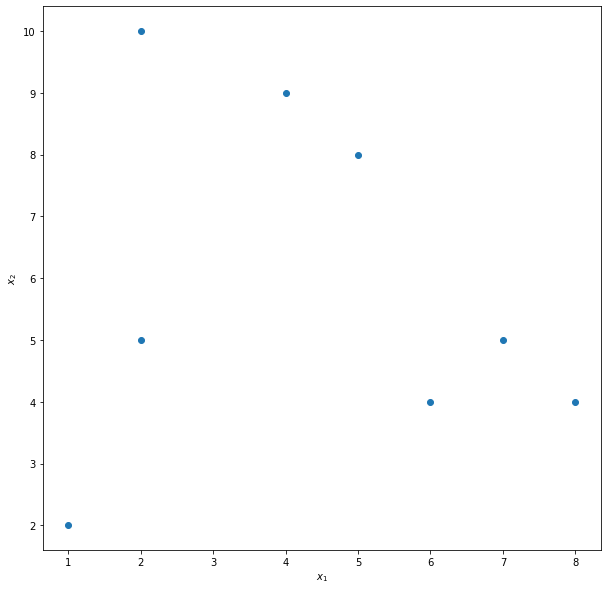

In [1]:
import numpy as np

X = np.array([[2, 10], [2, 5], [8, 4],
              [5, 8], [7, 5], [6, 4],[1,2],[4,9]])

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_clusters(X):
    plt.scatter(X[:,0],X[:,1])
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    
plt.figure(figsize=(10,10))
plot_clusters(X)
plt.show() 

[0 2 1 1 1 1 2 0]
[[ 2.  10. ]
 [ 6.   6. ]
 [ 1.5  3.5]]


Text(0, 0.5, '$x_2$')

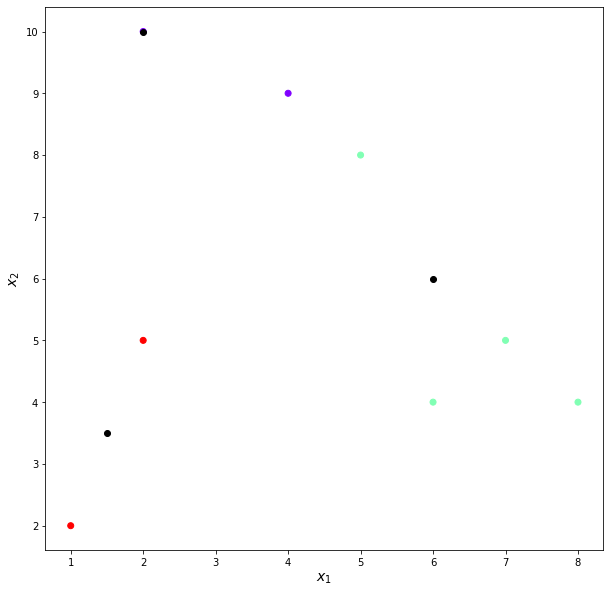

In [2]:
#Iteration 1
kmeans_iter1 = KMeans(n_clusters=3, init=np.array([[2, 10],[5, 8],[1,2]]), 
                      n_init=1, algorithm="full",max_iter=1, random_state=0).fit(X)


print(kmeans_iter1.labels_)


print(kmeans_iter1.cluster_centers_)


plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=kmeans_iter1.labels_, cmap='rainbow')
plt.scatter(kmeans_iter1.cluster_centers_[:,0] ,kmeans_iter1.cluster_centers_[:,1], color='black')
plt.xlabel("$x_1$", size=14)
plt.ylabel("$x_2$", size=14)

[0 2 1 0 1 1 2 0]
[[3.   9.5 ]
 [6.5  5.25]
 [1.5  3.5 ]]


Text(0, 0.5, '$x_2$')

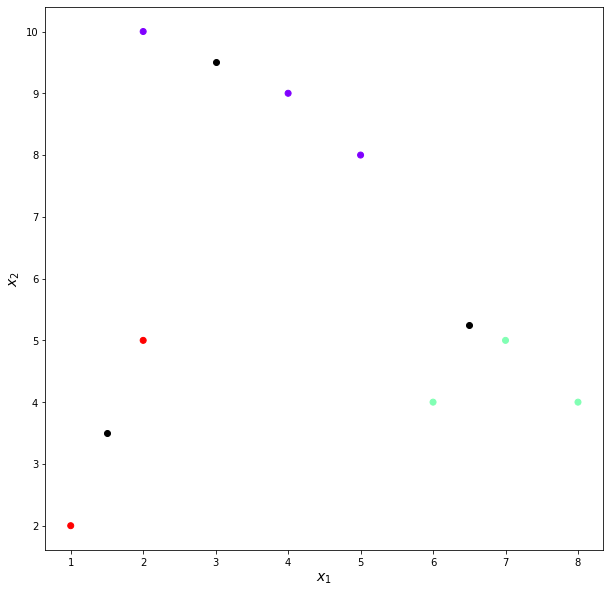

In [3]:
#Iteration 2
kmeans_iter2 = KMeans(n_clusters=3, init=np.array([[2, 10],[5, 8],[1,2]]), 
                      n_init=1, algorithm="full",max_iter=2, random_state=0).fit(X)


print(kmeans_iter2.labels_)


print(kmeans_iter2.cluster_centers_)


plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=kmeans_iter2.labels_, cmap='rainbow')
plt.scatter(kmeans_iter2.cluster_centers_[:,0] ,kmeans_iter2.cluster_centers_[:,1], color='black')
plt.xlabel("$x_1$", size=14)
plt.ylabel("$x_2$", size=14)

[0 2 1 0 1 1 2 0]
[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


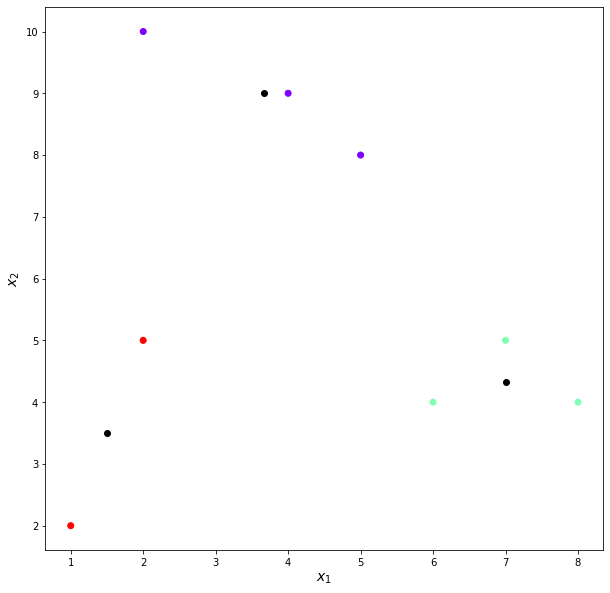

In [4]:
#Iteration 3
kmeans_iter3 = KMeans(n_clusters=3, init=np.array([[2, 10],[5, 8],[1,2]]), 
                      n_init=1, algorithm="full",max_iter=3, random_state=0).fit(X)


print(kmeans_iter3.labels_)


print(kmeans_iter3.cluster_centers_)


plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=kmeans_iter3.labels_, cmap='rainbow')
plt.scatter(kmeans_iter3.cluster_centers_[:,0] ,kmeans_iter3.cluster_centers_[:,1], color='black')
plt.xlabel("$x_1$", size=14)
plt.ylabel("$x_2$", size=14)
plt.show()

[0 2 1 0 1 1 2 0]
[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


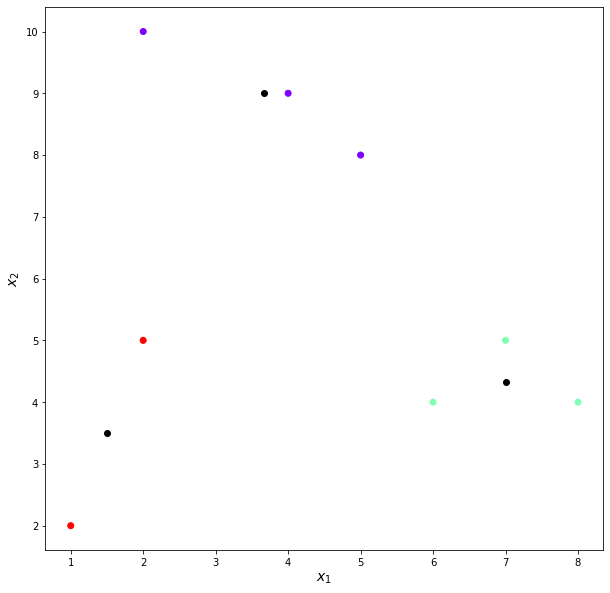

In [5]:
#Iteration 4
kmeans_iter4 = KMeans(n_clusters=3, init=np.array([[2, 10],[5, 8],[1,2]]), 
                      n_init=1, algorithm="full",max_iter=4, random_state=0).fit(X)


print(kmeans_iter4.labels_)


print(kmeans_iter4.cluster_centers_)


plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=kmeans_iter4.labels_, cmap='rainbow')
plt.scatter(kmeans_iter4.cluster_centers_[:,0] ,kmeans_iter4.cluster_centers_[:,1], color='black')
plt.xlabel("$x_1$", size=14)
plt.ylabel("$x_2$", size=14)
plt.show()

##### The black points are centroids. K-Means required 4 iterations to converge.

 #### DBSCAN on an array of points

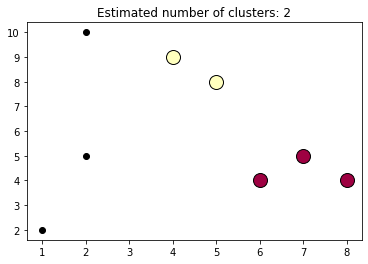

In [6]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

 ##### The points shown in black are noise points whereas points in cream and red are the two clusters.

 #### Single-link agglomerative hierarchical clustering


In [7]:
X = np.array([[2, 10], [2, 5], [8, 4],
              [5, 8], [7, 5], [6, 4],[1,2],[4,9]])

from scipy.cluster import hierarchy
Z1= hierarchy.linkage(X, method="single", metric="euclidean")
Z1

array([[ 3.        ,  7.        ,  1.41421356,  2.        ],
       [ 2.        ,  4.        ,  1.41421356,  2.        ],
       [ 5.        ,  9.        ,  1.41421356,  3.        ],
       [ 0.        ,  8.        ,  2.23606798,  3.        ],
       [ 1.        ,  6.        ,  3.16227766,  2.        ],
       [10.        , 11.        ,  3.60555128,  6.        ],
       [12.        , 13.        ,  4.12310563,  8.        ]])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [10.0, 10.0, 47.5, 47.5]],
 'dcoord': [[0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 1.4142135623730951],
  [1.4142135623730951, 3.605551275463989, 3.605551275463989, 2.23606797749979],
  [3.1622776601683795,
   4.123105625617661,
   4.123105625617661,
   3.605551275463989]],
 'ivl': ['1', '6', '5', '2', '4', '0', '3', '7'],
 'leaves': [1, 6, 5, 2, 4, 0, 3, 7],
 'color_list': ['C0', 'C1', 'C1', 'C2', 'C2', 'C0', 'C0']}

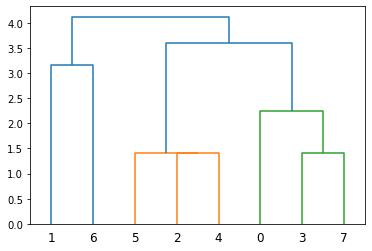

In [8]:
hierarchy.dendrogram(Z1)

In [9]:
#Complete-link agglomerative clustering
Z2= hierarchy.linkage(X, method="complete", metric="euclidean")
Z2

array([[ 3.        ,  7.        ,  1.41421356,  2.        ],
       [ 2.        ,  4.        ,  1.41421356,  2.        ],
       [ 5.        ,  9.        ,  2.        ,  3.        ],
       [ 1.        ,  6.        ,  3.16227766,  2.        ],
       [ 0.        ,  8.        ,  3.60555128,  3.        ],
       [10.        , 11.        ,  7.28010989,  5.        ],
       [12.        , 13.        ,  8.48528137,  8.        ]])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [12.5, 12.5, 56.25, 56.25]],
 'dcoord': [[0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 3.605551275463989, 3.605551275463989, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.0, 2.0, 1.4142135623730951],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [2.0, 7.280109889280518, 7.280109889280518, 3.1622776601683795],
  [3.605551275463989, 8.48528137423857, 8.48528137423857, 7.280109889280518]],
 'ivl': ['0', '3', '7', '5', '2', '4', '1', '6'],
 'leaves': [0, 3, 7, 5, 2, 4, 1, 6],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C3', 'C0', 'C0']}

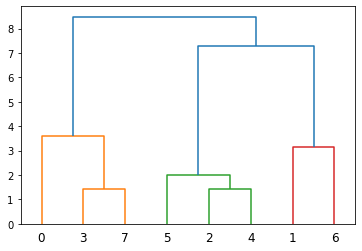

In [10]:
hierarchy.dendrogram(Z2)

In [11]:
#Average-link agglomerative clustering
Z3= hierarchy.linkage(X, method="average", metric="euclidean")
Z3

array([[ 3.        ,  7.        ,  1.41421356,  2.        ],
       [ 2.        ,  4.        ,  1.41421356,  2.        ],
       [ 5.        ,  9.        ,  1.70710678,  3.        ],
       [ 0.        ,  8.        ,  2.92080963,  3.        ],
       [ 1.        ,  6.        ,  3.16227766,  2.        ],
       [10.        , 12.        ,  5.76322446,  5.        ],
       [11.        , 13.        ,  5.92588718,  8.        ]])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [12.5, 12.5, 56.25, 56.25]],
 'dcoord': [[0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.9208096264818897, 2.9208096264818897, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 1.7071067811865475, 1.7071067811865475, 1.4142135623730951],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [1.7071067811865475,
   5.7632244641383785,
   5.7632244641383785,
   3.1622776601683795],
  [2.9208096264818897,
   5.925887181992689,
   5.925887181992689,
   5.7632244641383785]],
 'ivl': ['0', '3', '7', '5', '2', '4', '1', '6'],
 'leaves': [0, 3, 7, 5, 2, 4, 1, 6],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C3', 'C0', 'C0']}

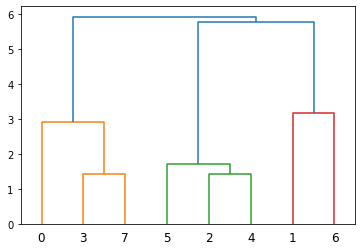

In [12]:
hierarchy.dendrogram(Z3)

 #### Color Quantization

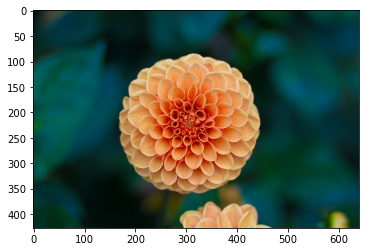

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

flower_image = load_sample_image('flower.jpg')
flower_array = np.array(flower_image, dtype=np.float64)/255
plt.imshow(flower_array)

In [14]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(flower_array.shape)
assert d == 3
image_array = np.reshape(flower_array, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0)[:1000]

n_colors = 64
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

# Get labels for all points
labels = kmeans.predict(image_array)

def recreate_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_idx]]
            label_idx += 1
    return image

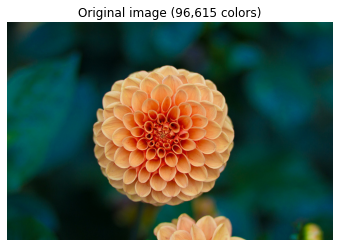

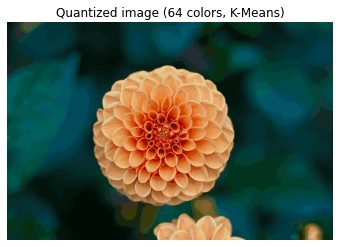

In [15]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(flower_array)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [16]:
# Elbow method to find best k
distortions = []

#Checking the quality of image for k=1 to 10 
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(image_array)
    distortions.append(kmeanModel.inertia_)

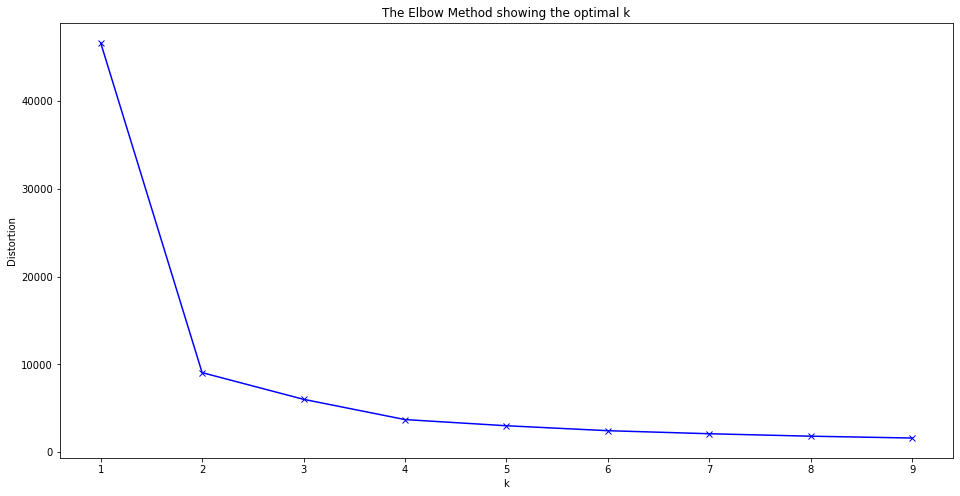

In [17]:
# Get labels for all points
labels = kmeans.predict(image_array)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### It looks like the optimal value of k (between 1 and 10) is  3 or 4 (any of the two is fine)

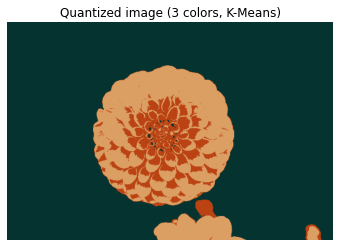

In [18]:
n_colors = 3
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
# Get labels for all points
labels = kmeans.predict(image_array)
plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (3 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [19]:
from sklearn.cluster import MiniBatchKMeans

kmeans = KMeans(n_clusters = 3, random_state=0)
kmeans.fit(image_array)
print("Inertia using KMeans :", str(kmeans.inertia_))
mini_batch_kmeans = MiniBatchKMeans(n_clusters = 3, random_state=0)
mini_batch_kmeans.fit(image_array)
print("Inertia using MiniBatchKMeans :", str(mini_batch_kmeans.inertia_))

Inertia using KMeans : 6025.342093639187
Inertia using MiniBatchKMeans : 6791.158239378407


##### With MiniBatchKMeans, inertia increased which means that the performance decreased.

In [20]:
%timeit KMeans(n_clusters=3, random_state=0).fit(image_array)
%timeit MiniBatchKMeans(n_clusters=3, random_state=0).fit(image_array)

1.59 s ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
730 ms ± 136 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### From the run time we can see that mini_batch_kmeans is faster than KMeans. However, its performance isn't better than KMeans.